In [1]:
import numpy as np
import pandas as pd
import os
import torch
import arnet
from arnet import ARNet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
save = True
debug = False

lrs = [0.003]
n_epoch = 10
valid_p = 0.1
train_bs = 32
valid_bs = 1024
experiments = [(10, 1.0), (10, 0.5)]

In [3]:
DIR = os.path.dirname(os.path.abspath(''))
data_path = os.path.join(DIR, 'ar_data')
results_dir = os.path.join(DIR, 'results')
if not os.path.exists(results_dir): 
    os.makedirs(results_dir)        

data_names = ['ar_3_ma_0_noise_0.100_len_10000'] 

In [4]:
if debug:
    experiments = [experiments[2]]
    lrs = [lrs[0]]
    data_names = [data_names[1]]

In [5]:
def run(name, ar_order, sparsity, lr):
    print("fitting: {} with ar_order: {}, sparsity: {}, lr: {}".format(name, ar_order, sparsity, lr))
    df = pd.read_csv(os.path.join(data_path, name + '.csv'), header=None, index_col=False)
    if debug:
        df = df[:10000]
        print("debug len df", len(df))

    m = arnet.ARNet(
        ar_order=ar_order,
        sparsity=sparsity,
        lr=lr, 
        n_epoch=n_epoch,
        loss_func="MSE",
        valid_p=valid_p,
        train_bs=train_bs,
        valid_bs=valid_bs,
        use_gpu=False,
    )
    m.fit(df, plot=True)

    if save:
        arnet.plot_weights(
            ar_val=ar_order,
            weights=m.coeff[0],
            model_name="{}_ar-{}_spar-{}_lr-{}".format(name, ar_order, sparsity, lr),
            save=True,
            savedir=results_dir,
        )
        plt.show()
    print("DONE with {}".format(name))
    return {"name": name, "ar": ar_order, "dense": sparsity, "lr": lr, "coeff": m.coeff[0]}

INFO: ARNet - tabularize: estimated noise of series: 0.12853080551811422


fitting: ar_3_ma_0_noise_0.100_len_10000 with ar_order: 10, sparsity: 1.0, lr: 0.003


INFO: ARNet - create_regularizer: reg lam (max): 0.0


epoch,train_loss,valid_loss,mse,mae,time
0,0.018363,0.015850,0.015850,0.099889,00:01
1,0.011116,0.010871,0.010871,0.083056,00:01
2,0.010437,0.010159,0.010159,0.080177,00:01
3,0.010540,0.010154,0.010154,0.080357,00:01
4,0.010396,0.010114,0.010114,0.080212,00:01
5,0.009697,0.010013,0.010013,0.079570,00:01
6,0.009918,0.010077,0.010077,0.080007,00:01
7,0.010216,0.010061,0.010061,0.079931,00:01
8,0.009905,0.010061,0.010061,0.079925,00:01
9,0.009840,0.010057,0.010057,0.079897,00:01


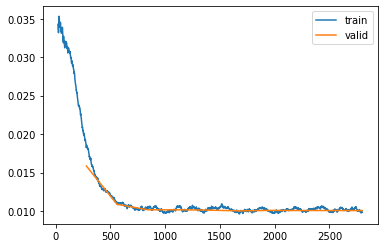

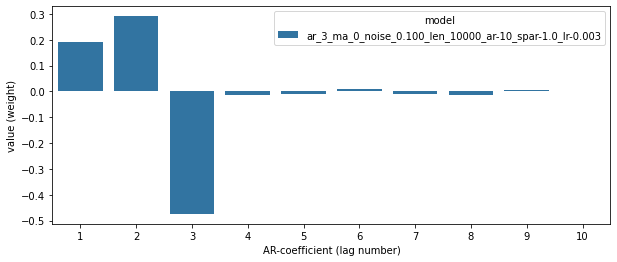

INFO: ARNet - tabularize: estimated noise of series: 0.12853080551811422


DONE with ar_3_ma_0_noise_0.100_len_10000
fitting: ar_3_ma_0_noise_0.100_len_10000 with ar_order: 10, sparsity: 0.5, lr: 0.003


INFO: ARNet - create_regularizer: reg lam (max): 0.009999999980000004


epoch,train_loss,valid_loss,mse,mae,time
0,0.027636,0.018755,0.018755,0.109487,00:01
1,0.011109,0.010290,0.010290,0.080812,00:01
2,0.010721,0.010131,0.010131,0.080181,00:01
3,0.011289,0.010114,0.010114,0.080131,00:01
4,0.011894,0.010085,0.010085,0.079902,00:01
5,0.011902,0.010098,0.010098,0.079976,00:01
6,0.011696,0.010090,0.010090,0.079965,00:01
7,0.012019,0.010076,0.010076,0.079895,00:01
8,0.011593,0.010085,0.010085,0.079948,00:01
9,0.011721,0.010083,0.010083,0.079941,00:01


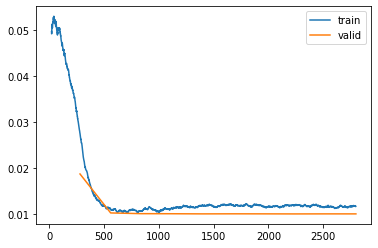

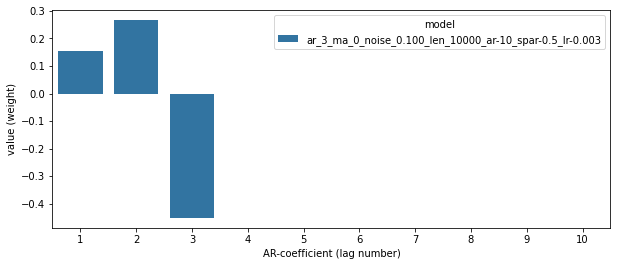

DONE with ar_3_ma_0_noise_0.100_len_10000
DONE


In [6]:
coeff_list = []
for ar_order, sparsity in experiments:
    for name in data_names:
        for lr in lrs:
            coeff_list.append(run(name, ar_order, sparsity, lr))
            df_coeff = pd.DataFrame(coeff_list)
            if save:
                df_coeff.to_csv(os.path.join(results_dir, "coeff.csv"), index=False)
print("DONE")